In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mostramos el DF, para ver la información del data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Codin Dojo/Pinguinos.csv')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


LIMPIEZA Y EXPLORACIÓN DE DATOS

Revisar si hay duplicados

In [5]:


duplicados=df.duplicated().sum()
print (duplicados)


0


Mostramos la vista general y específica del data frame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


#Se determina cuanto son los valores totales que están faltando.

In [7]:


print(df.isna().sum().sum(), 'missing values')



19 missing values


importamos las librerías necesarias para el proceso

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')



#Se determina la columna objetivo y se hace un train test split para posteriormente imputar los datos faltantes, se comenzará por las columnas númericas y posteriormente las columnas categoricas.

In [10]:


X = df.drop(columns=['species'])
y = df['species']
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [11]:
# instancien los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')
# seleccionen las columnas numéricas de cada tipo
num_columns = num_selector(X_train)
cat_columns = cat_selector(X_train)
# comprueben las listas
print('numeric columns are', num_columns)
print('categorical columns are', cat_columns)


numeric columns are ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'year']
categorical columns are ['island', 'sex']


In [12]:
# aíslen las columnas numéricas
df_num = df[num_columns]
# aíslen las columnas con datos faltantes
df_num.loc[:, df_num.isna().any()]



,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,55.8,19.8,207.0,4000.0
340,43.5,18.1,202.0,3400.0
341,49.6,18.2,193.0,3775.0
342,50.8,19.0,210.0,4100.0


In [13]:
#Columnas que le faltan datos

X_train.isna().any()


island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [14]:
# Instancien el objeto imputer de la clase SimpleImputer con la estrategia 'median'
median_imputer = SimpleImputer(strategy='median')
# Encajen el objeto imputer en los datos de entrenamiento numérico con .fit()
# calculen las medianas (medians) de las columnas en el conjunto de entrenamiento
median_imputer.fit(X_train[num_columns])
#Utilicen la mediana a partir de los datos de entrenamiento para rellenar los valores que en falten
#las columnas numericas de los conjuntos de entrenamiento y de prueba con  .transform()
X_train.loc[:, num_columns] = median_imputer.transform(X_train[num_columns])
X_test.loc[:, num_columns] = median_imputer.transform(X_test[num_columns])


In [15]:
X_train.isna().any()



island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                   True
year                 False
dtype: bool

In [16]:
# instancien los selectores a nuestros tipos de datos numéricos y categóricos
num_selector = make_column_selector(dtype_include='number')
cat_selector = make_column_selector(dtype_include='object')


In [17]:
# Instanciar SimpleImputers con estrategias most_frequent y median
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')


In [18]:
# creen tuplas de (imputer, selector) para cada tipo de dato
num_tuple = (median_imputer, num_selector)
cat_tuple = (freq_imputer, cat_selector)
# instanciación de ColumnTransformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder='passthrough')
col_transformer


ColumnTransformer(remainder='passthrough',
                  transformers=[('simpleimputer-1',
                                 SimpleImputer(strategy='median'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f319d2c5480>),
                                ('simpleimputer-2',
                                 SimpleImputer(strategy='most_frequent'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f31a5e9e620>)])

In [19]:
# ajustar ColumnTransformer en los datos de entrenamiento
col_transformer.fit(X_train)
# transformen los datos de entrenamiento y de prueba (esto generará un array de NumPy)
X_train_imputed = col_transformer.transform(X_train)
X_test_imputed = col_transformer.transform(X_test)
# cambien el resultado regreso a un DataFrame
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_train_imputed.isna().any()



island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
year                 False
dtype: bool

Revisaremos si hay inconsistencia en los datos para los valores categoricos:

In [20]:
df['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [21]:
df['sex'].value_counts()

sex
male      168
female    165
Name: count, dtype: int64

In [22]:
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

Se confirma que no hay inconsistencias en los datos categóricos

## Producido texto en negritavisuales univariantes para el objetivo y todas las características

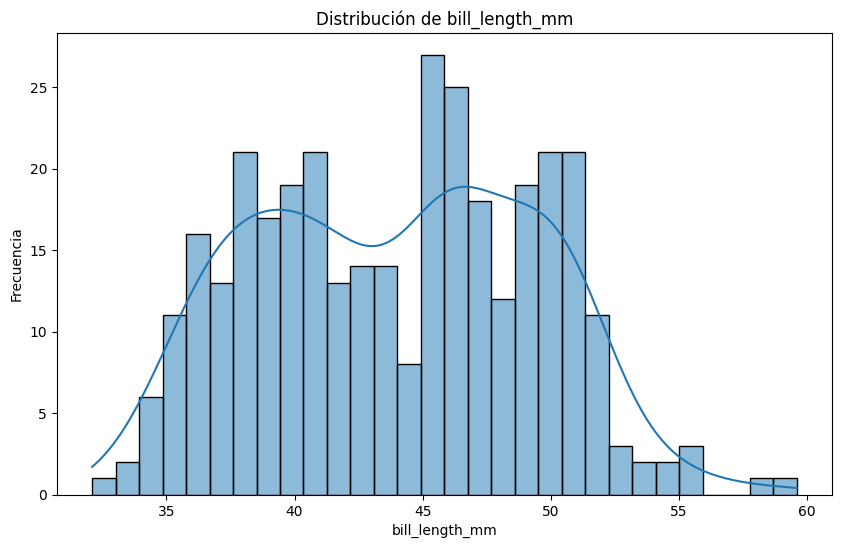

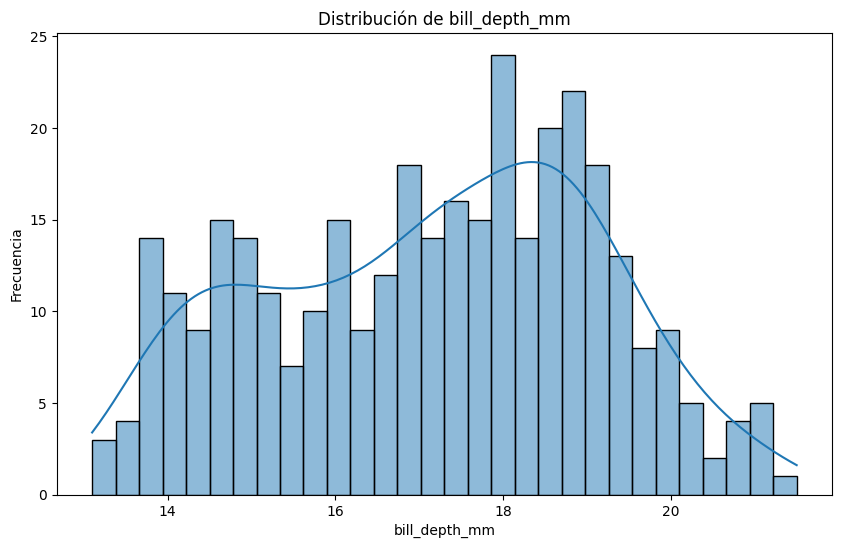

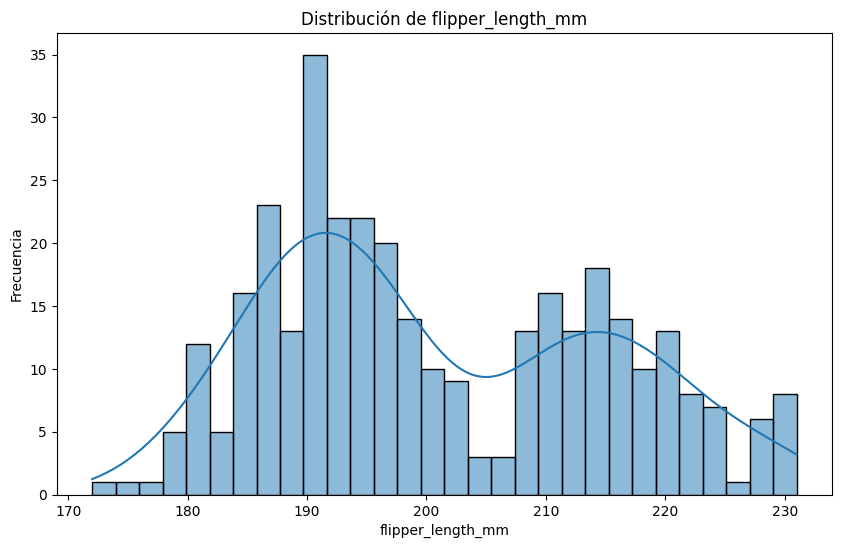

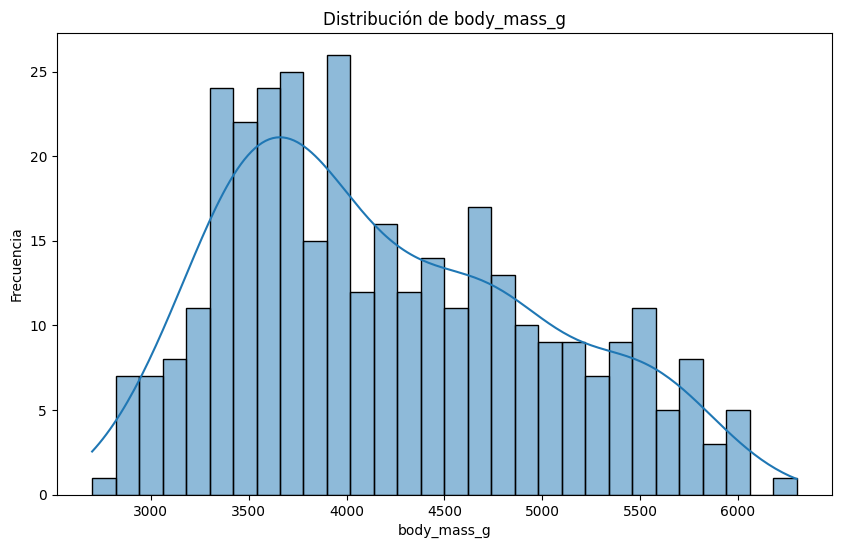

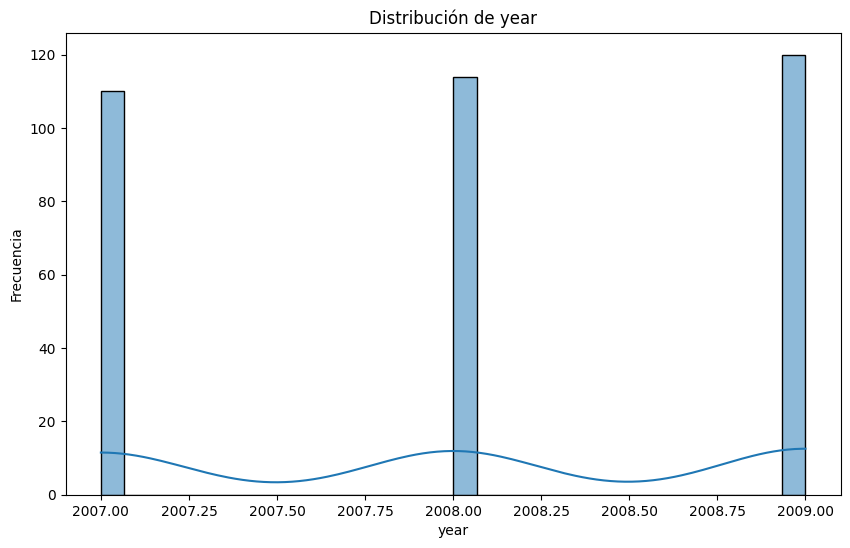

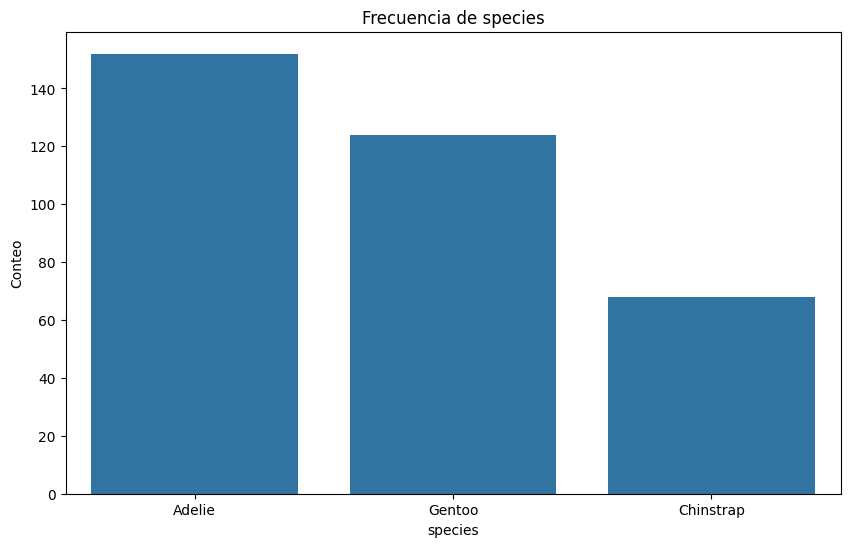

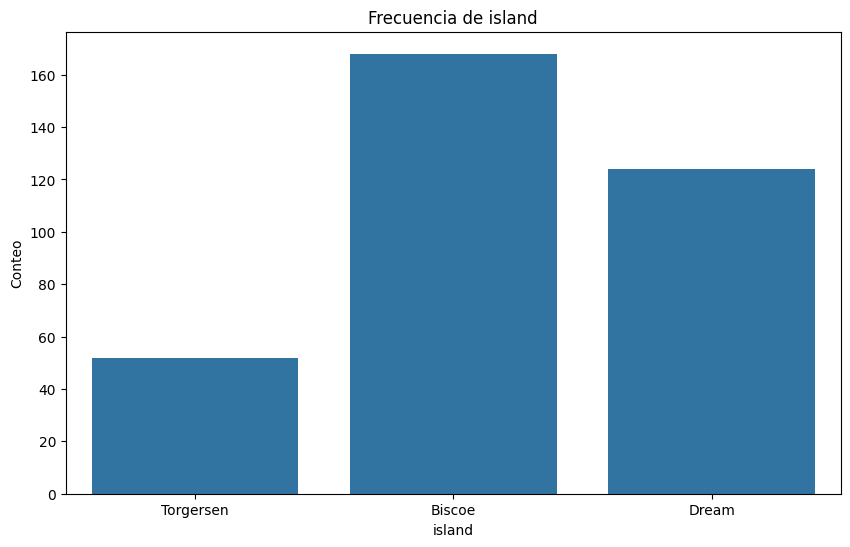

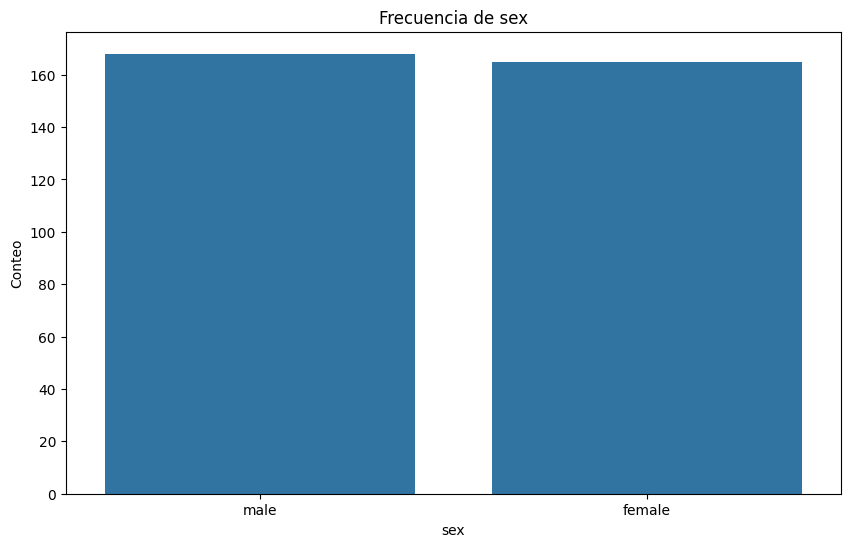

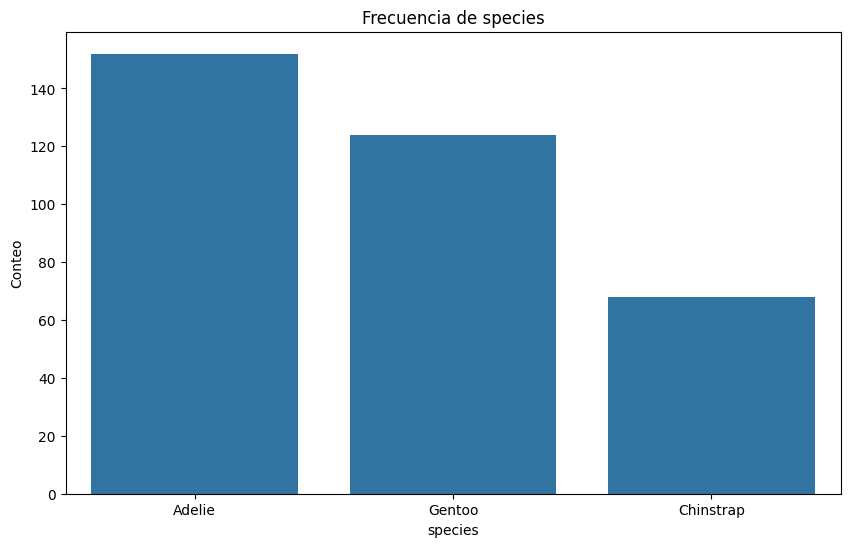

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Identificar las columnas numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Crear histogramas para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30)
    plt.title(f'Distribución de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

# Identificar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear gráficos de barras para cada columna categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[column])
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Conteo')
    plt.show()

# Gráfico de barras para el objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x=df['species'])
plt.title('Frecuencia de species')
plt.xlabel('species')
plt.ylabel('Conteo')
plt.show()


## producido un mapa de calor de correlación e identificado cualquier correlaciones moderadas o fuertes entre el objetivo y las características y/o entre una característica y otra

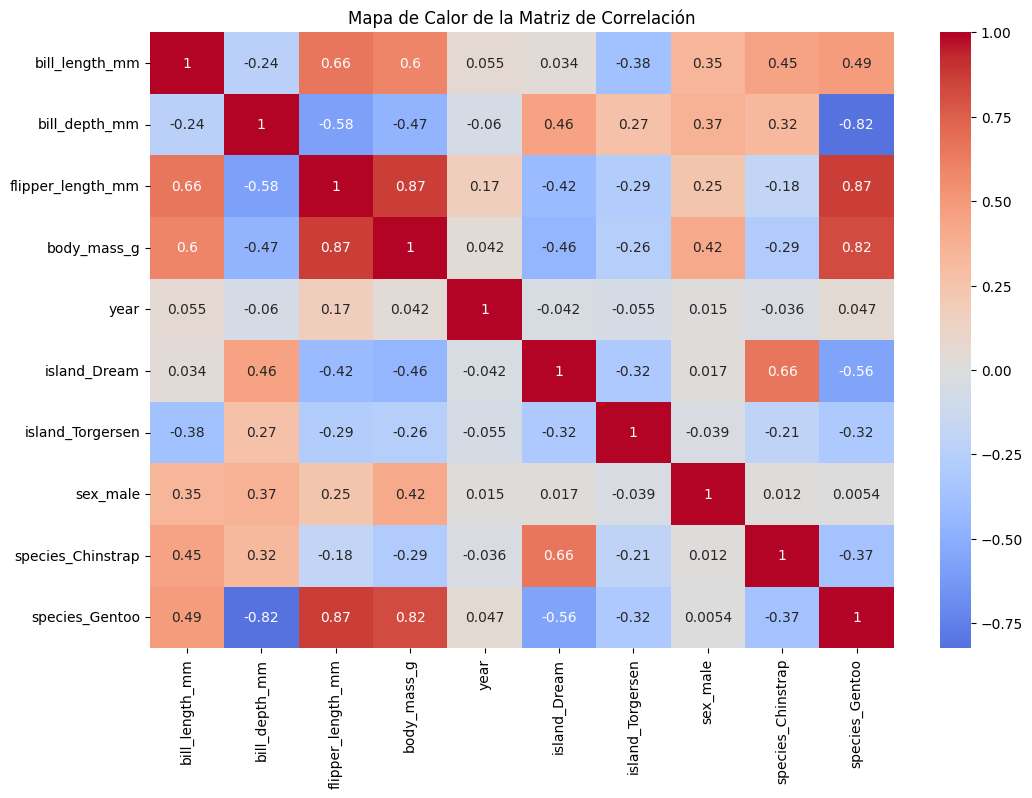

Correlaciones moderadas o fuertes (>= 0.5):
flipper_length_mm - bill_length_mm: 0.6561813407464264
body_mass_g - bill_length_mm: 0.5951098244376273
flipper_length_mm - bill_depth_mm: -0.5838512164654143
species_Gentoo - bill_depth_mm: -0.8243572593368009
bill_length_mm - flipper_length_mm: 0.6561813407464264
bill_depth_mm - flipper_length_mm: -0.5838512164654143
body_mass_g - flipper_length_mm: 0.8712017673060111
species_Gentoo - flipper_length_mm: 0.8684870896038764
bill_length_mm - body_mass_g: 0.5951098244376273
flipper_length_mm - body_mass_g: 0.8712017673060111
species_Gentoo - body_mass_g: 0.818197509857229
species_Chinstrap - island_Dream: 0.6611506255027051
species_Gentoo - island_Dream: -0.5636363636363635
island_Dream - species_Chinstrap: 0.6611506255027051
bill_depth_mm - species_Gentoo: -0.8243572593368009
flipper_length_mm - species_Gentoo: 0.8684870896038764
body_mass_g - species_Gentoo: 0.818197509857229
island_Dream - species_Gentoo: -0.5636363636363635


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Convertir variables categóricas a variables dummy
df_encoded = pd.get_dummies(df, columns=['island', 'sex', 'species'], drop_first=True)

# Calcular la matriz de correlación
correlation_matrix = df_encoded.corr()

# Producir el mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

# Función para encontrar correlaciones moderadas o fuertes
def find_strong_correlations(correlation_matrix, threshold=0.5):
    strong_corrs = []
    for column in correlation_matrix.columns:
        for row in correlation_matrix.index:
            if abs(correlation_matrix.loc[row, column]) >= threshold and row != column:
                strong_corrs.append((row, column, correlation_matrix.loc[row, column]))
    return strong_corrs

# Encontrar correlaciones moderadas y fuertes
strong_correlations = find_strong_correlations(correlation_matrix, threshold=0.5)
print("Correlaciones moderadas o fuertes (>= 0.5):")
for corr in strong_correlations:
    print(f"{corr[0]} - {corr[1]}: {corr[2]}")
